# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns

In [3]:
sns.set()
plt.style.use('ggplot')
from IPython.core.pylabtools import figsize
figsize(12, 8)
palette = sns.color_palette(["#4286f4","#f44141"])

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    np.random.seed(seed)    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
# colunas
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [7]:
# dataframe
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [8]:
# dimensões
athletes.shape

(11538, 11)

In [9]:
# informações
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [10]:
# tipos de dados
athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [11]:
# tabela percentual de dados faltantes
total = athletes.isnull().sum().sort_values(ascending=False)
percentual = (athletes.isnull().sum()/athletes.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percentual], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
missing_data.index.name =' Variaveis numericas'
missing_data.head(20)

,Dados Ausentes,% Percentual
Variaveis numericas,,
weight,659,0.057116
height,330,0.028601
dob,1,0.000087
bronze,0,0.000000
silver,0,0.000000
gold,0,0.000000
sport,0,0.000000
sex,0,0.000000
nationality,0,0.000000


In [12]:
# algumas caracteristicas
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


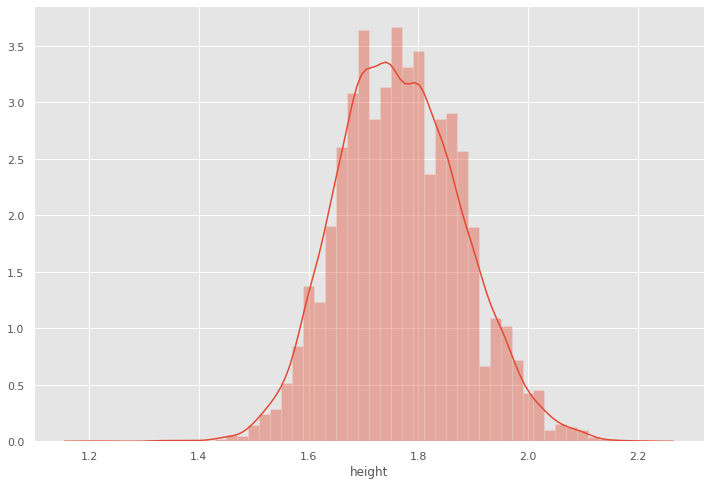

In [13]:
#distribuição da altura
sns.distplot(athletes['height'])

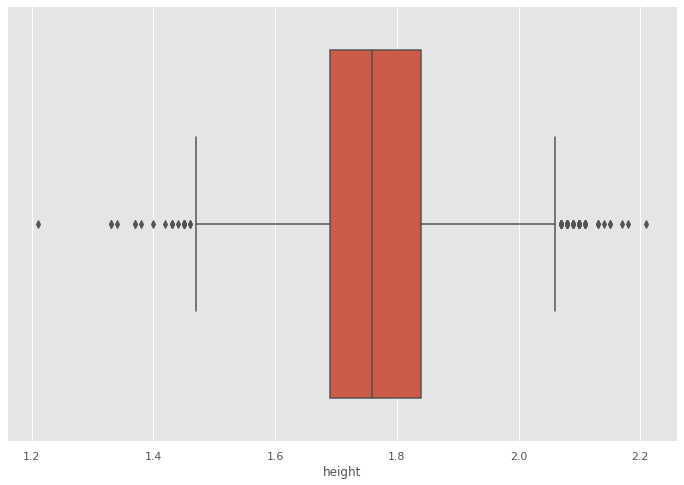

In [14]:
sns.boxplot(athletes['height'])

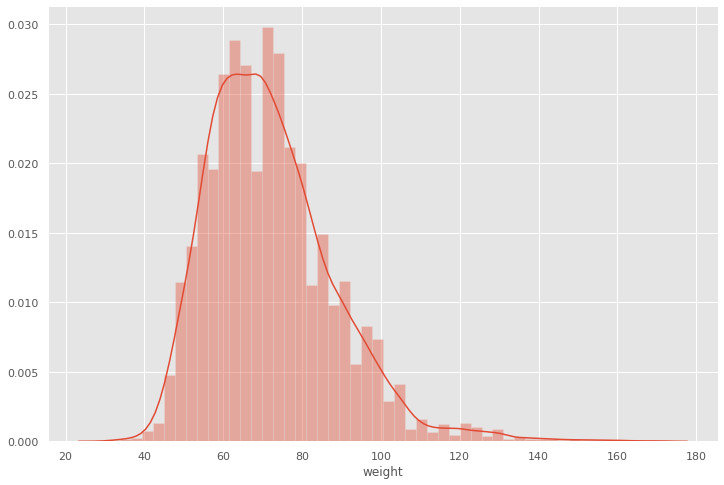

In [15]:
# distribuição da peso
sns.distplot(athletes['weight'])

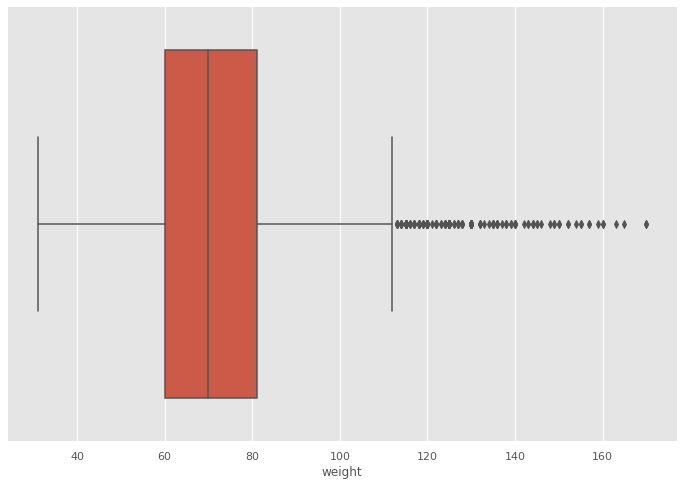

In [16]:
sns.boxplot(athletes['weight'])

In [17]:
print(f'Media peso: {athletes.weight.mean()} e altura: {athletes.height.mean()}')

Media peso: 72.06820479823513 e altura: 1.766282119914347


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [18]:
def q1():
    sh = sct.shapiro(get_sample(athletes,'height',3000))
    return bool(sh[1] > 0.05)  # p_valor > alpha 

q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

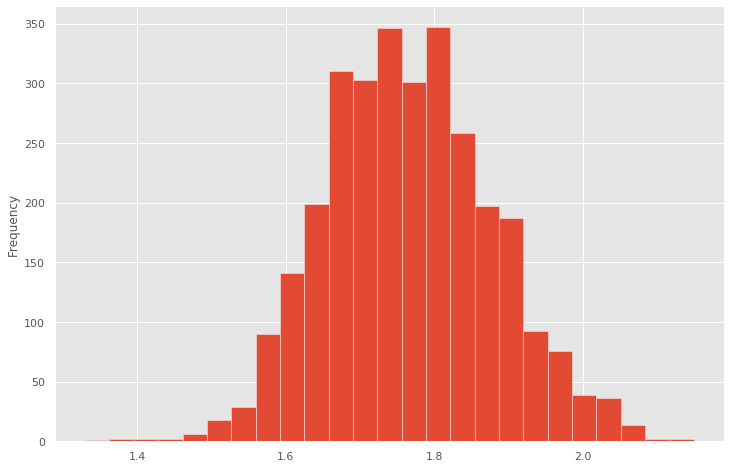

In [19]:
amostra = get_sample(athletes,'height',3000)
amostra.plot(kind = 'hist', bins = 25)

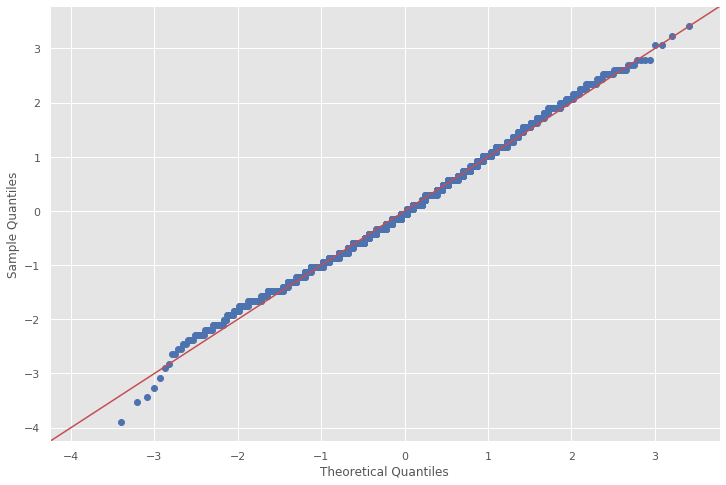

In [20]:
sm.qqplot(amostra, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [21]:
def q2():
    jb = sct.jarque_bera(get_sample(athletes,'height',3000))
    return bool(jb[1] > 0.05)  # p_valor > alpha 

q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [22]:
def q3():
    per = sct.normaltest(get_sample(athletes,'weight',3000))
    return bool(per[1] > 0.05)  # p_valor > alpha 

q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

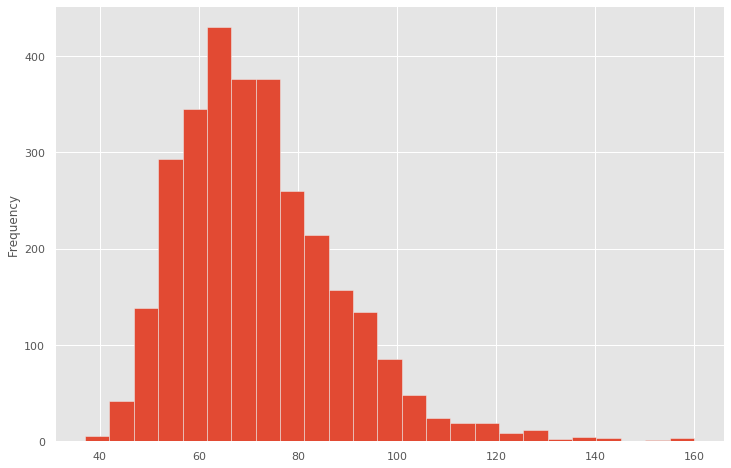

In [23]:
amostra = get_sample(athletes,'weight',3000)
amostra.plot(kind = 'hist', bins = 25)

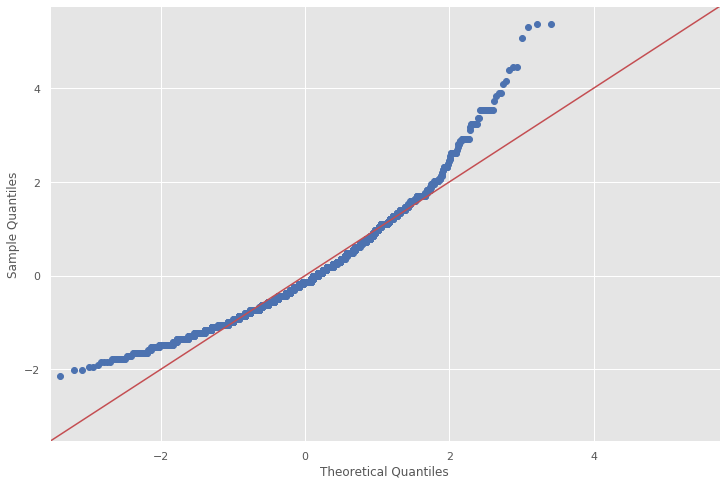

In [24]:
sm.qqplot(amostra, fit=True, line="45");

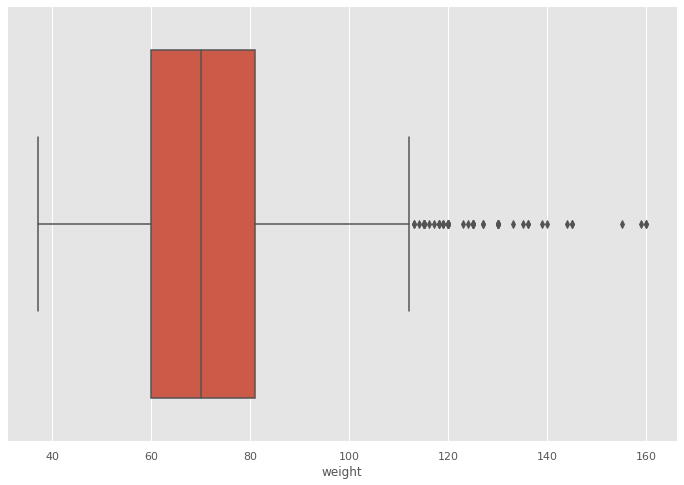

In [25]:
sns.boxplot(amostra)

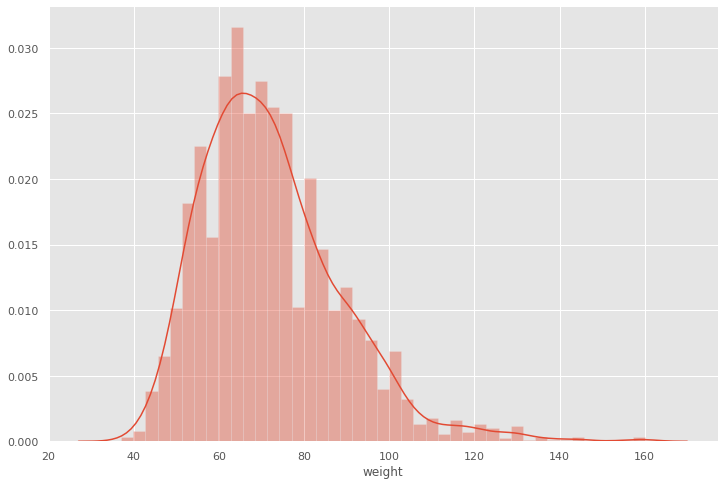

In [26]:
sns.distplot(amostra)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [27]:
def q4():
    res = sct.normaltest(np.log(get_sample(athletes,'weight',3000)))
    return bool(res[1] > 0.05)  # p_valor > alpha 

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

In [28]:
amostra = get_sample(athletes,'weight',3000) # amostra aleatoria
weight_log = np.log(amostra) # transformação logaritmica 
sct.normaltest(weight_log) # teste de D'Agostino-Pearson

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

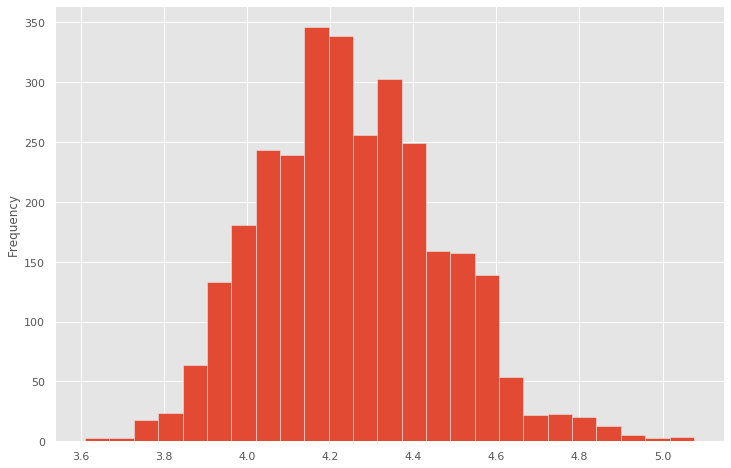

In [29]:
weight_log.plot(kind = 'hist', bins = 25)

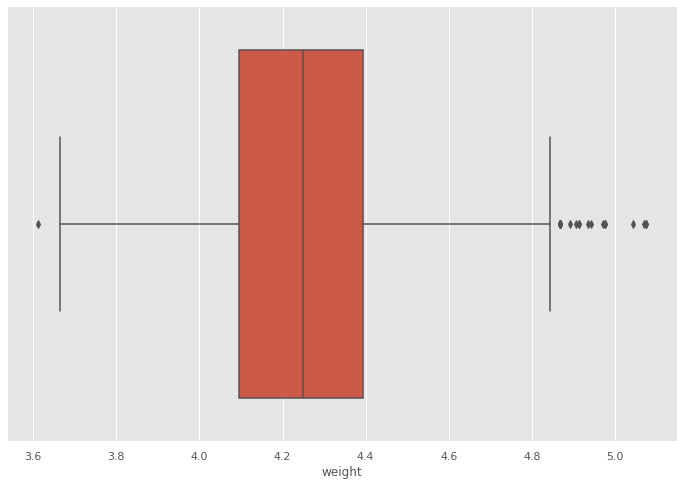

In [30]:
sns.boxplot(weight_log)

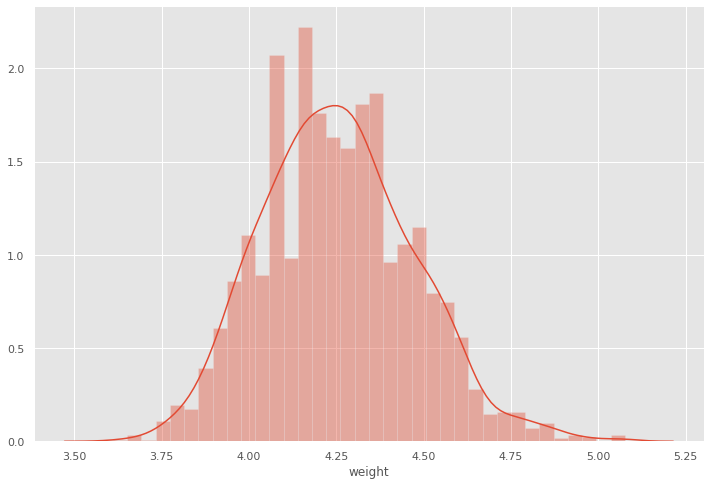

In [31]:
sns.distplot(weight_log)

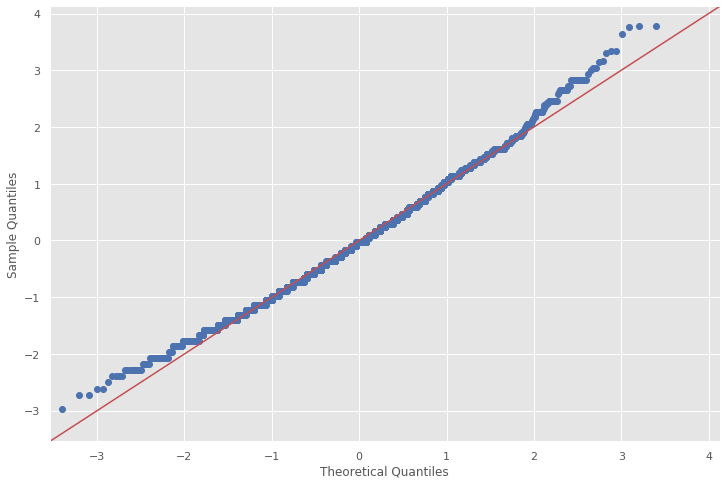

In [32]:
sm.qqplot(weight_log, fit=True, line="45");

> __Para as questão 5, 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [33]:
def q5():
    bra = athletes.loc[athletes.nationality == 'BRA','height'].dropna()
    usa = athletes.loc[athletes.nationality == 'USA','height'].dropna()
    res = sct.ttest_ind(bra, usa, equal_var = False)
    return bool(res[1] > 0.05)

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [34]:
def q6():
    bra = athletes.loc[athletes.nationality == 'BRA','height'].dropna()
    can = athletes.loc[athletes.nationality == 'CAN','height'].dropna()
    res = sct.ttest_ind(bra, can, equal_var = False)
    return bool(res[1] > 0.05)

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [35]:
def q7():
    usa = athletes.loc[athletes.nationality == 'USA','height'].dropna()
    can = athletes.loc[athletes.nationality == 'CAN','height'].dropna()
    res = sct.ttest_ind(usa, can, equal_var = False)
    return float(round(res[1],8))

q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [36]:
bra = athletes.loc[athletes.nationality == 'BRA','height'].dropna()
usa = athletes.loc[athletes.nationality == 'USA','height'].dropna()
can = athletes.loc[athletes.nationality == 'CAN','height'].dropna()

In [37]:
sct.ttest_ind(usa, can, equal_var = False)

Ttest_indResult(statistic=3.516987632488539, pvalue=0.00046601293473888875)

In [38]:
sct.ttest_ind(usa, bra, equal_var = False)

Ttest_indResult(statistic=3.2232436467501553, pvalue=0.0013080041830144061)

In [39]:
sct.ttest_ind(bra, can, equal_var = False)

Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)